<a href="https://colab.research.google.com/github/francianerod/PROJETOS-SoulCode/blob/main/Projeto_PySpark_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD1

Data de entrega: 18 de abril de 2023

Professor: Bismark William

Alunos: Franciane Rodrigues

Colaboração: Guilherme Lins e Karen Almeida

## **Solicitação**

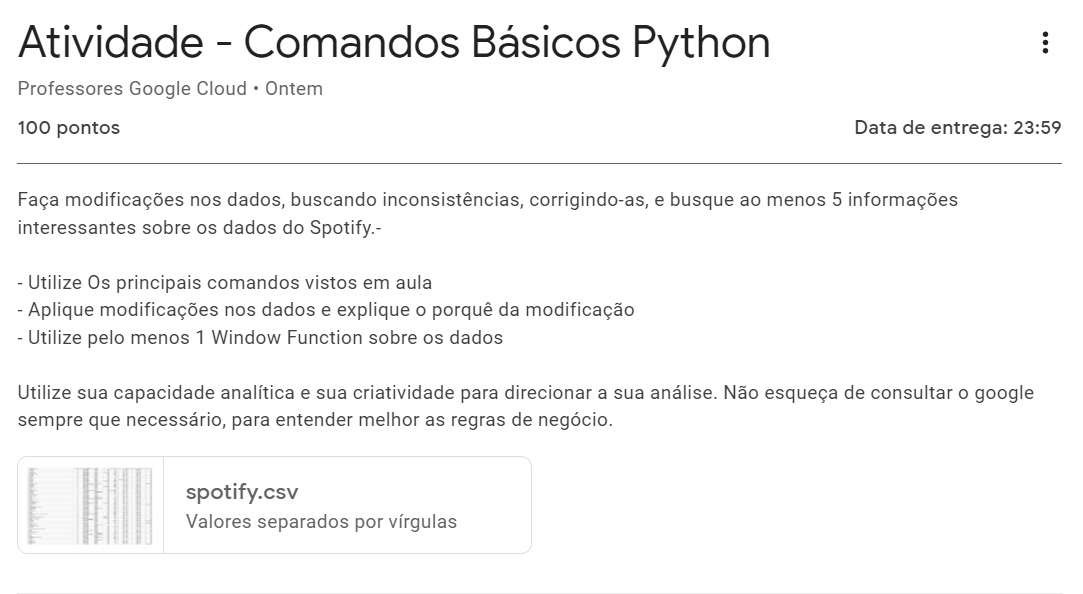

## **Dicionário de dados**

*   _c0: ID
*   song_name: nome da música
*   song_popularity: popularidade da música de 0 a 100
*   song_duration_ms: duração da musica em milissegundo
*   Acousticness: O valor que descreve o quão acústica é uma música. Valores mais altos significam que é mais provável que a música seja acústica. Varia entre 0-1.
*   danceability: A medida relativa da faixa sendo dançante. Valores mais altos significam que a música é mais dançante. Varia entre 0-1.
*   energy: A medida relativa da faixa sendo dançante. Valores mais altos significam que a música é mais dançante. Varia entre 0-1.
*   instrumentalness: A proporção relativa da faixa sendo instrumental. Valores mais altos significam que a música contém mais sons instrumentais. Varia entre 0-1
*   key: Todas as teclas na oitava codificadas como valores que variam de 0 a 11, começando em C como 0, C# como 1, etc.
*   liveness: Detecta a presença de uma audiência na gravação. Valores mais altos representam uma probabilidade aumentada de que a faixa foi tocada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa. Varia entre 0-1.
*   loudness: O volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. Loudness é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 dB.
*   audio_mode: Modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.
*   speechiness: A duração relativa da faixa que contém qualquer tipo de voz humana. Variou entre 0-1.
*   tempo: O andamento da faixa em Beat Per Minute (BPM)
*   time_signature:
*   audio_valence: A positividade da pista. Valores mais altos significam que a faixa evoca emoções positivas (como alegria), caso contrário, significa que evoca emoções negativas (como raiva, medo). Varia entre 0-1.

Fonte desta tabela: https://www.kaggle.com/code/fpolcari/spotify-songs-popularity-analysis



## **Instalação de bibliotecas e importação de módulos**

In [1]:
# Instalação de pacotes
#!pip install gcsfs
#!pip install pyspark

In [2]:
# Impotação de módulos
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pyspark.sql.functions as F
from google.cloud import storage
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType,FloatType,DoubleType

## **Conector para Cloud Storage(bucket)**

In [3]:
# Configuração da chave de segurança para acesso ao bucket
serviceAccount = '/content/drive/MyDrive/Projeto Looker/effective-pipe-377819-3488414144c9.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [4]:
# Informações do arquivo do bucket a ser utilizado
# caminho do bucket: francianerodrigues01/brutos/spotify.csv
client = storage.Client()
bucket = client.get_bucket('francianerodrigues01')
bucket.blob('spotify.csv')
path = 'gs://francianerodrigues01/brutos/spotify.csv'

## **Extração via PySpark**

In [5]:
# Configurar a variavel de ambiente (sessão)
spark = (SparkSession.builder
                     .master('local')
                     .appName('Projeto_PySpark_Spotify')
                     .config("spark.jars", 'https://storage.googleapis.com/hadoop-lib/gcs/gcs-connector-hadoop2-latest.jar')
                     .getOrCreate()
)

In [6]:
# Importando o dataframe
df = (
    spark.read
         .format('csv')
         .option('delimiter', ',')
         .option('header', 'true')
         .option('inferschema', 'true')
         .option('encoding', 'utf-8')
         .option('escape','"')
         .load(path)
)

## **Pré-Análise via PySpark**

In [7]:
# Mostrando a base de dados as 20 primeiras posições
df.show(truncate=False)

+---+--------------------------+---------------+----------------+----------------------+-----------------------+---------------------+---------------------+---+----------------------+-----------------------+----------+----------------------+-------+--------------+---------------------+
|_c0|song_name                 |song_popularity|song_duration_ms|acousticness          |danceability           |energy               |instrumentalness     |key|liveness              |loudness               |audio_mode|speechiness           |tempo  |time_signature|audio_valence        |
+---+--------------------------+---------------+----------------+----------------------+-----------------------+---------------------+---------------------+---+----------------------+-----------------------+----------+----------------------+-------+--------------+---------------------+
|0  |Boulevard of Broken Dreams|73             |262333          |0.005520000000000001kg|0.496mol/L             |682                  |2.94e

In [8]:
# Visualisando as colunas existentes no dataframe
df.columns

['_c0',
 'song_name',
 'song_popularity',
 'song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'audio_mode',
 'speechiness',
 'tempo',
 'time_signature',
 'audio_valence']

In [9]:
# Visualisando os tipos da variáveis
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- song_name: string (nullable = true)
 |-- song_popularity: string (nullable = true)
 |-- song_duration_ms: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- audio_mode: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- time_signature: string (nullable = true)
 |-- audio_valence: string (nullable = true)



In [10]:
# Dimensão do dataframe - quantidade de registro e quantidade de colunas
print(f'({df.count()}, {len(df.columns)})')

(18835, 16)


In [11]:
# ver inconsistências nas análises estatisticas descritivas 
df.summary().show()

+-------+-----------------+--------------------+-----------------+--------------------+------------+------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+------------------+
|summary|              _c0|           song_name|  song_popularity|    song_duration_ms|acousticness|danceability|           energy|  instrumentalness|               key|          liveness|          loudness|        audio_mode|       speechiness|             tempo|      time_signature|     audio_valence|
+-------+-----------------+--------------------+-----------------+--------------------+------------+------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+------------------+
|  count|            18835|               18835|            18835|               1883

## **Transformação via PySpark**


*   1) Retirar id
*   2) Duplicatas
*   3) Retirar dentro das colunas - "kg" e "mol/l"
*   4) Retirar os "nao_sei'
*   Item da lista
*   Item da lista
*   Item da lista
*   4) Mudando as colunas para valor numérico
*   5) Verificar valor nulo
*   Item da lista

In [12]:
# RETIRAR ID
# Passo 1: Retirar o ID
df = df.drop(F.col('_c0'))

In [13]:
# DUPLICATAS
# Passo 2: Verifique as linhas duplicadas
total = df.count() - df.dropDuplicates().count()
print(f'Total de Registros Duplicados = {total}')

Total de Registros Duplicados = 3903


In [14]:
# Passo 3: Retire as linhas duplicadas
df = df.dropDuplicates()
df.count()

14932

In [15]:
# RETIRAR LETRAS DENTRO DAS COLUNAS
# Passo 5: Retirar "kg" e "mol/l" da coluna 'acousticness' e 'danceability'
df = df.withColumn('acousticness', F.split(F.col('acousticness'), 'k').getItem(0)).withColumn('danceability', F.split(F.col('danceability'), 'm').getItem(0))

In [16]:
# Passo 6: ver tabela de análise estatistica descritiva
df.summary().show()

+-------+--------------------+------------------+--------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+------------------+
|summary|           song_name|   song_popularity|    song_duration_ms|      acousticness|       danceability|            energy|  instrumentalness|               key|          liveness|          loudness|        audio_mode|       speechiness|             tempo|      time_signature|     audio_valence|
+-------+--------------------+------------------+--------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+------------------+
|  count|               14932|             14932|               14932|             14932|     

In [17]:
# Passo 7: Verificar os 'nao_sei' das colunas que apresentaram essa inconsistência
df.filter(F.col('time_signature').contains('nao_sei')).show()

# song_popularity = 1
# energy = 1
# instrumentalness = 2
# liveness = 4
# loudness = 1
# audio_mode = 1
# tempo = 1
# time_signature = 1

+-------------+---------------+----------------+------------+------------------+------+----------------+---+--------+--------+----------+-----------+------+--------------+-------------+
|    song_name|song_popularity|song_duration_ms|acousticness|      danceability|energy|instrumentalness|key|liveness|loudness|audio_mode|speechiness| tempo|time_signature|audio_valence|
+-------------+---------------+----------------+------------+------------------+------+----------------+---+--------+--------+----------+-----------+------+--------------+-------------+
|Nobody's Fool|             16|          287400|      0.0478|0.3670000000000001|   445|             284|  9|     199| -13.615|         0|        286|67.197|       nao_sei|          149|
+-------------+---------------+----------------+------------+------------------+------+----------------+---+--------+--------+----------+-----------+------+--------------+-------------+



In [18]:
# Passo 8: Retirar as colunas com "nao_sei"
df = df.replace('nao_sei', None)
df = df.replace('0.nao_sei', None)
df = df.dropna(how='any')

In [20]:
# Passo 9: Mudando para numéricos as colunas abaixo: a vantagem de usar esse método é que tudo que for diferente será atribuido "null"
df = df.withColumn('song_popularity', F.col('song_popularity').cast(IntegerType()))\
       .withColumn('song_duration_ms', F.col('song_duration_ms').cast(IntegerType()))\
       .withColumn('audio_mode', F.col('audio_mode').cast(IntegerType()))\
       .withColumn('time_signature', F.col('time_signature').cast(IntegerType()))\
       .withColumn('acousticness', F.col('acousticness').cast(FloatType()))\
       .withColumn('danceability', F.col('danceability').cast(FloatType()))\
       .withColumn('energy', F.col('energy').cast(FloatType()))\
       .withColumn('instrumentalness', F.col('instrumentalness').cast(DoubleType()))\
       .withColumn('key', F.col('key').cast(FloatType()))\
       .withColumn('liveness', F.col('liveness').cast(FloatType()))\
       .withColumn('loudness', F.col('loudness').cast(FloatType()))\
       .withColumn('speechiness', F.col('speechiness').cast(FloatType()))\
       .withColumn('tempo', F.col('tempo').cast(FloatType()))\
       .withColumn('audio_valence', F.col('audio_valence').cast(FloatType()))

In [21]:
# Passo 10: Verificação de valores nulos
df.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+
|song_name|song_popularity|song_duration_ms|acousticness|danceability|energy|instrumentalness|key|liveness|loudness|audio_mode|speechiness|tempo|time_signature|audio_valence|
+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+
|        0|              0|               1|           0|           0|  2613|             977|  0|     794|    2154|         0|        455| 1403|             1|         2087|
+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+



In [22]:
# Passo 11: Analisando o que vem a ser o valor nulo da coluna energy
df_backup.filter(F.col('song_name') == 'The Morning').show(truncate=True)

+-----------+---------------+----------------+------------+------------+--------------------+----------------+---+--------------------+--------+----------+--------------------+-------+--------------+--------------------+
|  song_name|song_popularity|song_duration_ms|acousticness|danceability|              energy|instrumentalness|key|            liveness|loudness|audio_mode|         speechiness|  tempo|time_signature|       audio_valence|
+-----------+---------------+----------------+------------+------------+--------------------+----------------+---+--------------------+--------+----------+--------------------+-------+--------------+--------------------+
|The Morning|             72|          312426|       0.317|       0.652|5.489.999.999.999...|             0.0|  6|                 104|  -7.555|         0|                  39|120.073|             4|18.600.000.000.00...|
|The Morning|             53|          275080|      0.0417|       0.635|                0.66|             0.0|  7|35

In [23]:
# Passo 12: Retirando as linhas do tipo NULL
df = df.dropna(how='any')

In [24]:
# Passo 13: Dimensão do dataframe - quantidade de registro e quantidade de colunas 
print(f'({df.count()}, {len(df.columns)})')

(7128, 15)


In [25]:
# Passo 14: Verificação de valores nulos após retirada de qualquer linha que tivesse valores nulos
df.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+
|song_name|song_popularity|song_duration_ms|acousticness|danceability|energy|instrumentalness|key|liveness|loudness|audio_mode|speechiness|tempo|time_signature|audio_valence|
+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+
|        0|              0|               0|           0|           0|     0|               0|  0|       0|       0|         0|          0|    0|             0|            0|
+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+



In [36]:
# Passo 15: Visualizar base de dados e registrar backup
df.show(truncate = False)

+--------------------------------------------------------------------+---------------+----------------+------------+------------+------+----------------+----+--------+--------+----------+-----------+-------+--------------+-------------+
|song_name                                                           |song_popularity|song_duration_ms|acousticness|danceability|energy|instrumentalness|key |liveness|loudness|audio_mode|speechiness|tempo  |time_signature|audio_valence|
+--------------------------------------------------------------------+---------------+----------------+------------+------------+------+----------------+----+--------+--------+----------+-----------+-------+--------------+-------------+
|Lambada - Original Version 1989                                     |67             |207466          |0.211       |0.756       |0.8   |723.0           |5.0 |47.0    |-5.158  |1         |329.0      |118.921|4             |967.0        |
|Shake, Rattle And Roll                             

## **Carregamento**

In [38]:
# Exportando base tratada do  PySpark para GCP
df.write.format("csv").save('gs://francianerodrigues01/tratados/spotify_tratado.csv')

## **Atividade**

In [31]:
#AS MÚSICAS POPULARES SÃO AS MAIS DANÇANTES?
#AS MÚSICAS POPULARES SÃO AS COM MAIOR ENERGIA? 
#AS MÚSICAS MAIS POPULARES POSSUEM MAIOR TEMPO? 
#AS MÚSICAS COM INSTRUMENTALIDADE SÃO AS MAIS POPULARES? 

In [34]:
# Passo 16: Selecionando as colunas para responder o problema
corr_spark = df.select('song_popularity', 'danceability', 'energy', 'tempo', 'instrumentalness')
corr_pandas = corr_spark.toPandas()

In [35]:
# Passo 17: analise descritiva
corr_pandas.describe()

,song_popularity,danceability,energy,tempo,instrumentalness
count,7128.000000,7128.000000,7128.000000,7128.000000,7128.000000
mean,48.770763,0.616974,554.637146,120.395638,178.066787
std,20.217866,0.161400,293.469574,28.616405,287.954510
min,0.000000,0.000000,0.040000,0.000000,0.000000
25%,37.000000,0.513000,373.000000,98.850752,0.000000
50%,52.000000,0.628000,597.000000,119.973000,0.000021
75%,63.000000,0.734000,797.000000,137.833244,253.000000
max,99.000000,0.980000,998.000000,242.317993,998.000000


In [47]:
# Passo 18: Padronozação dos dados para comparação da variabilidade

# Padronizando os dados
from sklearn.preprocessing import StandardScaler

# Cria o objeto scaler
scaler = StandardScaler()

# Fit e transformação dos dados
df_padronizado = pd.DataFrame(scaler.fit_transform(corr_pandas))

# Criando um dicionário de nomes
nomes= {0: "song_popularity", 
        1: "danceability", 
        2: "energy",
        3: "tempo",
        4: "instrumentalness",
        }

# Renomeando as colunas
df_padronizado = df_padronizado.rename(columns=nomes)
df_padronizado

,song_popularity,danceability,energy,tempo,instrumentalness
0,0.901703,0.861436,-1.887337,-0.051535,1.892561
1,0.505986,0.334758,0.423797,1.619128,-0.618429
2,0.951168,-0.210508,-0.032841,1.148176,-0.618429
3,-0.532772,-0.966446,1.238249,1.818643,-0.503819
4,0.456521,-0.476945,0.652116,1.517186,-0.618428
...,...,...,...,...,...
7123,-0.928490,0.533037,0.168216,0.358294,-0.618428
7124,0.951168,-0.619458,0.229556,-0.818876,1.809209
7125,1.544744,0.254208,-0.888186,-1.620081,-0.618428
7126,-0.285449,0.731316,0.226148,0.827638,1.052091


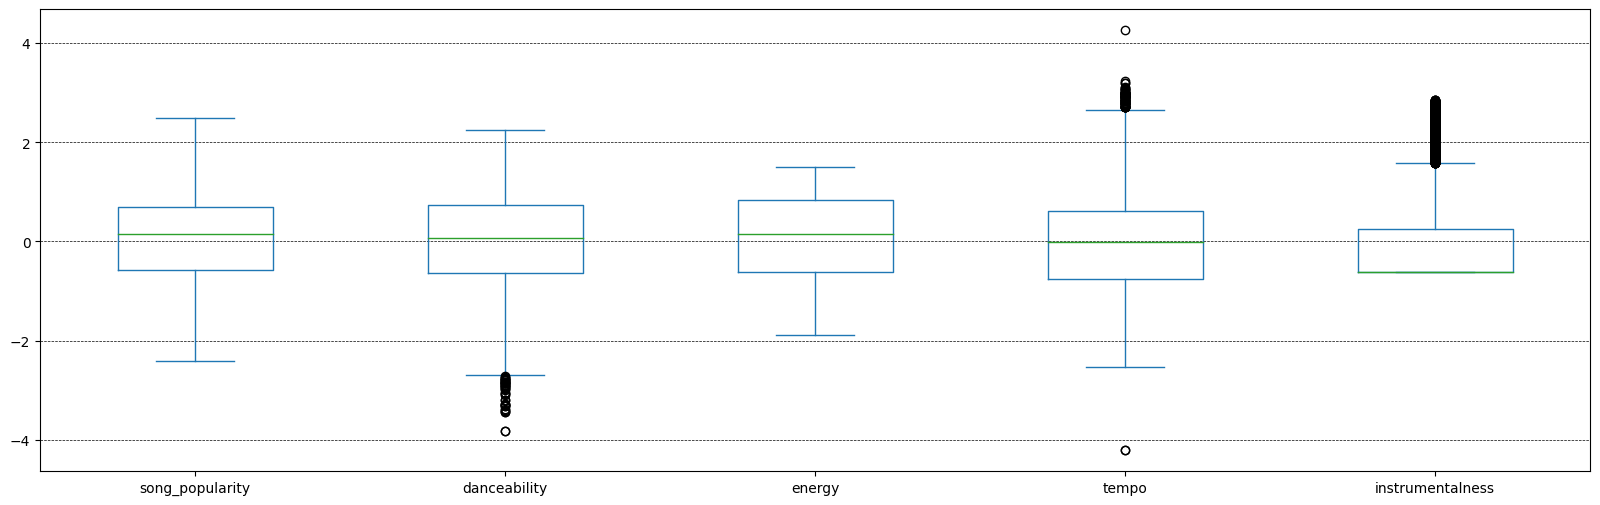

In [49]:
# Visualização da padronização - existencia de outliers
df_padronizado[['song_popularity',	
                 'danceability',	
                 'energy',	
                 'tempo', 
                 'instrumentalness',	
                 ]].plot.box(figsize=(20,6))
                 
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y')
plt.show()

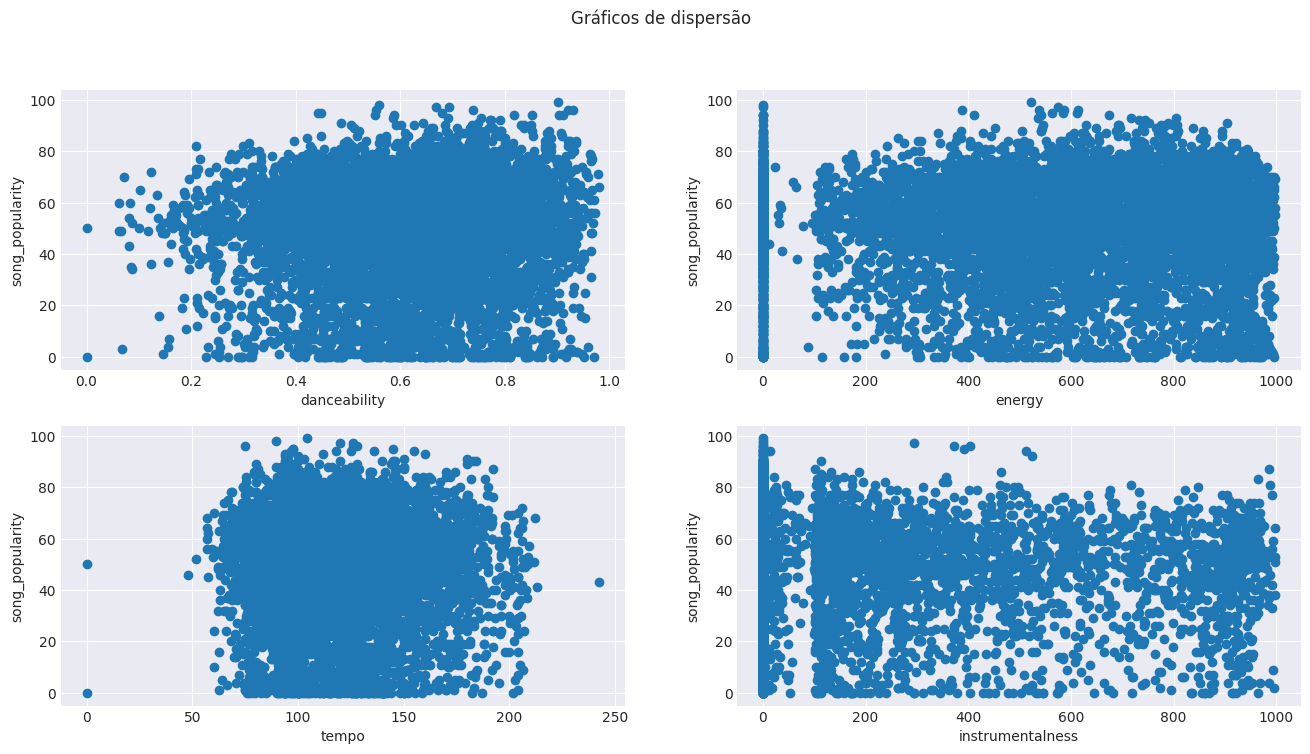

In [75]:
# Gráficos de dispersão
# Cria uma figura com 2x2 subplots
fig, axs = plt.subplots(nrows=2, ncols=2,  figsize=(16, 8))

# Define um estilo de plot personalizado
sns.set_style('darkgrid')

# Plota os quatro gráficos de dispersão em cada subplot
axs[0, 0].scatter(corr_pandas['danceability'], corr_pandas['song_popularity'])
axs[0, 1].scatter(corr_pandas['energy'], corr_pandas['song_popularity'])
axs[1, 0].scatter(corr_pandas['tempo'], corr_pandas['song_popularity'])
axs[1, 1].scatter(corr_pandas['instrumentalness'], corr_pandas['song_popularity'])

# Definição dos eixos
axs[0,0].set_xlabel('danceability')
axs[0,0].set_ylabel('song_popularity')
axs[0,1].set_xlabel('energy')
axs[0,1].set_ylabel('song_popularity')
axs[1,0].set_xlabel('tempo')
axs[1,0].set_ylabel('song_popularity')
axs[1,1].set_xlabel('instrumentalness')
axs[1,1].set_ylabel('song_popularity')

# Define o título global da figura
fig.suptitle('Gráficos de dispersão')

# Exibe o gráfico
plt.show()

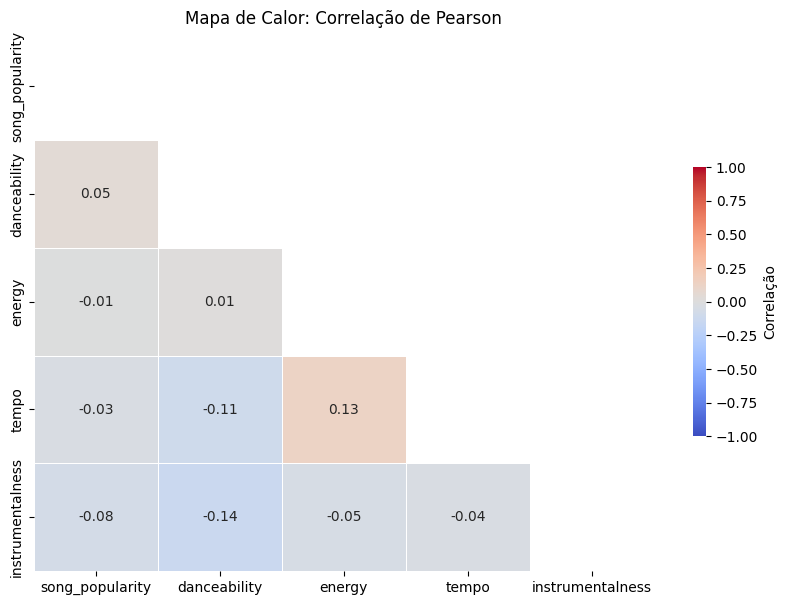

In [53]:
# Correlação de Pearson com dados padronizados
# Definição da variável resposta: song_popularity

correlation = df_padronizado.corr(method='pearson')
mascara = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize = ((10, 7)))
plot = sns.heatmap(correlation, 
                   mask=mascara,
                   annot = True, 
                   fmt=".2f", vmax=1, center=0, vmin=-1, 
                   cbar=True, cmap='coolwarm', 
                   linewidths=.5, 
                   cbar_kws={"shrink": .5, 'label': 'Correlação', 'orientation': 'vertical'})

plt.title("Mapa de Calor: Correlação de Pearson")
plt.show()

In [ ]:
df_padronizado[['song_popularity',	
                 'danceability',	
                 'energy',	
                 'tempo', 
                 'instrumentalness',	

## **Conclusão**

Os boxplot mostram a distribuição dos dados e que os atributos possuem outliers, quem em primeiro momento não foram tratados. O gráfico de dispersão mostra que os dados estão bastante dispersos e sem direcionamento, indicando baixa correlação. 

Para reforçar essa observação, foi realizado o método da correlação linear de Pearson calculado e obtido através do mapa de calor, nota-se correlaçao próximo a zero indicando relação lienar fraca ou inexistente. 

Isso significa que os atributos 'danceability', 'energy', 'tempo', 'instrumentalness' podem não ser capazes de prever ou explicar a 'song_popularity' (variável resposta/alvo) no âmbito linear. 

É importante notar que, mesmo que a correlação seja baixa, ainda pode haver uma relação entre as variáveis, mas essa relação simplesmente não é linear e que é necessário ser investigado estatisticamente.   